In [1]:
!git clone https://github.com/ksismanis/overlapping-community-detection-gat.git

Cloning into 'overlapping-community-detection-gat'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 82 (delta 21), reused 17 (delta 11), pack-reused 48
Receiving objects: 100% (82/82), 16.66 MiB | 10.94 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [5]:
!ls /content/overlapping-community-detection-gat


data		   LICENSE  nocd-gat.ipynb  README.md	      setup.py
interactive.ipynb  nocd     nocd-gat.py     requirements.txt


In [6]:
!pip3 install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [7]:
!pip install  numpy==1.23.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 50.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.1 which is incompatible.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.23.1 which is incompatible.
tensorflow 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.23.1 which is incompatible.


In [1]:
!pip install scipy
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.0 MB/s eta 0:00:00


In [8]:
!cp -va /content/overlapping-community-detection-gat/nocd /content

'/content/overlapping-community-detection-gat/nocd' -> '/content/nocd'
'/content/overlapping-community-detection-gat/nocd/__init__.py' -> '/content/nocd/__init__.py'
'/content/overlapping-community-detection-gat/nocd/data.py' -> '/content/nocd/data.py'
'/content/overlapping-community-detection-gat/nocd/generate.py' -> '/content/nocd/generate.py'
'/content/overlapping-community-detection-gat/nocd/metrics' -> '/content/nocd/metrics'
'/content/overlapping-community-detection-gat/nocd/metrics/__init__.py' -> '/content/nocd/metrics/__init__.py'
'/content/overlapping-community-detection-gat/nocd/metrics/supervised.py' -> '/content/nocd/metrics/supervised.py'
'/content/overlapping-community-detection-gat/nocd/metrics/unsupervised.py' -> '/content/nocd/metrics/unsupervised.py'
'/content/overlapping-community-detection-gat/nocd/nn' -> '/content/nocd/nn'
'/content/overlapping-community-detection-gat/nocd/nn/__init__.py' -> '/content/nocd/nn/__init__.py'
'/content/overlapping-community-detection-

In [10]:
import os
import time
import nocd
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sp
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GAT
from torch_geometric.nn import GCN
from torch_geometric.nn import GIN
from torch_geometric.nn import GraphSAGE
from torch_geometric.nn import SignedGCN
from torch_geometric.loader import GraphSAINTRandomWalkSampler
import time
import statistics

from sklearn.preprocessing import normalize

device = torch.device("cuda:0")
torch.set_default_tensor_type(torch.cuda.FloatTensor)

In [11]:
!cp -va  /content/overlapping-community-detection-gat/data /content

'/content/overlapping-community-detection-gat/data' -> '/content/data'
'/content/overlapping-community-detection-gat/data/facebook_ego' -> '/content/data/facebook_ego'
'/content/overlapping-community-detection-gat/data/facebook_ego/fb_0.npz' -> '/content/data/facebook_ego/fb_0.npz'
'/content/overlapping-community-detection-gat/data/facebook_ego/fb_107.npz' -> '/content/data/facebook_ego/fb_107.npz'
'/content/overlapping-community-detection-gat/data/facebook_ego/fb_1684.npz' -> '/content/data/facebook_ego/fb_1684.npz'
'/content/overlapping-community-detection-gat/data/facebook_ego/fb_1912.npz' -> '/content/data/facebook_ego/fb_1912.npz'
'/content/overlapping-community-detection-gat/data/facebook_ego/fb_3437.npz' -> '/content/data/facebook_ego/fb_3437.npz'
'/content/overlapping-community-detection-gat/data/facebook_ego/fb_348.npz' -> '/content/data/facebook_ego/fb_348.npz'
'/content/overlapping-community-detection-gat/data/facebook_ego/fb_3980.npz' -> '/content/data/facebook_ego/fb_3980.

In [62]:

# f = 'fb384gatA'
# loader = nocd.data.load_dataset('/content/overlapping-community-detection-gat/data/facebook_ego/facebook_ego/fb_348.npz')
# f = 'fb414gatA'
# loader = nocd.data.load_dataset('/content/overlapping-community-detection-gat/data/facebook_ego/fb_414.npz')
# f = 'fb686gatA'
# loader = nocd.data.load_dataset('/content/overlapping-community-detection-gat/data/facebook_ego/fb_686.npz')
# f = 'fb698gcnX'
# loader = nocd.data.load_dataset('/content/overlapping-community-detection-gat/data/facebook_ego//fb_698.npz')
# f = 'fb1684gcnA'
# loader = nocd.data.load_dataset('//content/overlapping-community-detection-gat/data/facebook_ego/fb_1684.npz')
# f = 'fb1912gcnA'
# loader = nocd.data.load_dataset('/content/overlapping-community-detection-gat/data/facebook_ego/fb_1912.npz')

# f= 'mag_chemgatA'
# loader = nocd.data.load_dataset('data/mag_chem.npz')
f= 'mag_csgatX'
loader = nocd.data.load_dataset('data/mag_cs.npz')
# f= 'mag_enggatA'
# loader = nocd.data.load_dataset('data/mag_eng.npz')
# f= 'mag_medgatX'
# loader = nocd.data.load_dataset('data/mag_med.npz')

A, X, Z_gt = loader['A'], loader['X'], loader['Z']
N, K = Z_gt.shape

hidden_sizes = [128]    # hidden sizes of the GNN
weight_decay = 1e-2     # strength of L2 regularization on GNN weights
dropout = 0.5           # whether to use dropout
batch_norm = True       # whether to use batch norm
lr = 1e-3               # learning rate
max_epochs = 500        # number of epochs to train
display_step = 25       # how often to compute validation loss
balance_loss = True     # whether to use balanced loss
stochastic_loss = True  # whether to use stochastic or full-batch training
batch_size = 20000      # batch size (only for stochastic training)

# batch_size = 20      # batch size (only for stochastic training)


In [63]:
x_norm = normalize(X)  # node features
# x_norm = normalize(A)  # adjacency matrix
# x_norm = sp.hstack([normalize(X), normalize(A)])  # concatenate A and X
x_norm = nocd.utils.to_sparse_tensor(x_norm).cuda()
sampler = nocd.sampler.get_edge_sampler(A, batch_size, batch_size, num_workers=5)
# gnn = nocd.nn.GCN(x_norm.shape[1], hidden_sizes, K, batch_norm=batch_norm, dropout=dropout).cuda()
gnn = nocd.nn.GAT(x_norm.shape[1],hidden_sizes,K,batch_norm=batch_norm,dropout=dropout).cuda()
adj_norm = gnn.normalize_adj(A)
decoder = nocd.nn.BerpoDecoder(N, A.nnz, balance_loss=balance_loss)
opt = torch.optim.Adam(gnn.parameters(), lr=lr)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [64]:
def get_nmi(thresh=0.5):
    """Compute Overlapping NMI of the communities predicted by the GNN."""
    gnn.eval()
    # Z = F.relu(gnn(x_norm, adj_norm))
    Z = F.leaky_relu(gnn(x_norm, adj_norm))
    Z_pred = Z.cpu().detach().numpy() > thresh
    nmi = nocd.metrics.overlapping_nmi(Z_pred, Z_gt)
    return nmi


In [65]:
def train():
    loss_values=[]
    epochs = []
    val_loss = np.inf
    validation_fn = lambda: val_loss
    early_stopping = nocd.train.NoImprovementStopping(validation_fn, patience=5)
    model_saver = nocd.train.ModelSaver(gnn)
    for epoch, batch in enumerate(sampler):
        if epoch > max_epochs:
            break
        if epoch % 25 == 0:
            with torch.no_grad():
                gnn.eval()
                # Compute validation loss
                Z = F.relu(gnn(x_norm, adj_norm))
                val_loss = decoder.loss_full(Z, A)
                print(f'Epoch {epoch:4d}, loss.full = {val_loss:.4f}, nmi = {get_nmi():.2f}')
                loss_values.append(val_loss.cpu())
                epochs.append(epoch)
                # Check if it's time for early stopping / to save the model
                early_stopping.next_step()
                if early_stopping.should_save():
                    model_saver.save()
                if early_stopping.should_stop():
                    print(f'Breaking due to early stopping at epoch {epoch}')
                    break

        # Training step
        gnn.train()
        opt.zero_grad()
        Z = F.relu(gnn(x_norm, adj_norm))
        ones_idx, zeros_idx = batch
        if stochastic_loss:
            loss = decoder.loss_batch(Z, ones_idx, zeros_idx)
        else:
            loss = decoder.loss_full(Z, A)
        loss += nocd.utils.l2_reg_loss(gnn, scale=weight_decay)
        loss.backward()
        opt.step()

    thresh = 0.5
    Z = F.relu(gnn(x_norm, adj_norm))
    Z_pred = Z.cpu().detach().numpy() > thresh
    model_saver.restore()
    nmi = get_nmi(thresh)
    print(f'Final nmi = {nmi:.3f}')
    print(loss_values)
    return(nmi, loss_values, epochs)


In [ ]:
res = []
times = []
for loops in range(50):
    print('loop ', loops)
    st = time.time()
    nmi,loss_values,epochs = train()
    et = time.time()
    elapsed_time = et  - st
    res.append(nmi)
    times.append(elapsed_time)
    for layer in gnn.layers:
            layer.reset_parameters()
    if loops > 2:
        avg = statistics.mean(res)
        sd = statistics.stdev(res)
        avg_time  = statistics.mean(times)
        print('average nmi after', loops,'is ', avg)
        print('standard deviation  nmi  after', loops,'is ', sd)
        print('avrate time   after', loops,'is ', avg_time)
        print(f'average_wmi for {f} is: {avg:.3f}, time  is {avg_time:.3f} seconds, deviation is:  {sd:.4f}')

print(f'final average_wmi for {f} is: {avg:.3f}, time  is {avg_time:.3f} seconds, deviation is:  {sd:.4f}')
resultfile = open('gat_6_heads_with_features.txt', "a")
resultfile.writelines(f' {f} \t {avg:.3f} \t {avg_time:.3f}\t {sd:.3f} \n')
resultfile.close()


loop  0
Epoch    0, loss.full = 0.6698, nmi = 0.02
Epoch   25, loss.full = 0.2862, nmi = 0.40
Epoch   50, loss.full = 0.2602, nmi = 0.42
Epoch   75, loss.full = 0.2493, nmi = 0.43
Epoch  100, loss.full = 0.2480, nmi = 0.43
Epoch  125, loss.full = 0.2463, nmi = 0.43
Epoch  150, loss.full = 0.2487, nmi = 0.43
Epoch  175, loss.full = 0.2422, nmi = 0.43
Epoch  200, loss.full = 0.2436, nmi = 0.44
Epoch  225, loss.full = 0.2404, nmi = 0.44
Epoch  250, loss.full = 0.2400, nmi = 0.44
Epoch  275, loss.full = 0.2384, nmi = 0.44
Epoch  300, loss.full = 0.2377, nmi = 0.44
Epoch  325, loss.full = 0.2447, nmi = 0.41
Epoch  350, loss.full = 0.2423, nmi = 0.41
Epoch  375, loss.full = 0.2396, nmi = 0.42
Epoch  400, loss.full = 0.2376, nmi = 0.43
Epoch  425, loss.full = 0.2384, nmi = 0.43
Epoch  450, loss.full = 0.2358, nmi = 0.43
Epoch  475, loss.full = 0.2380, nmi = 0.44
Epoch  500, loss.full = 0.2437, nmi = 0.42
Final nmi = 0.435
[tensor(0.6698, device='cpu'), tensor(0.2862, device='cpu'), tensor(0.2

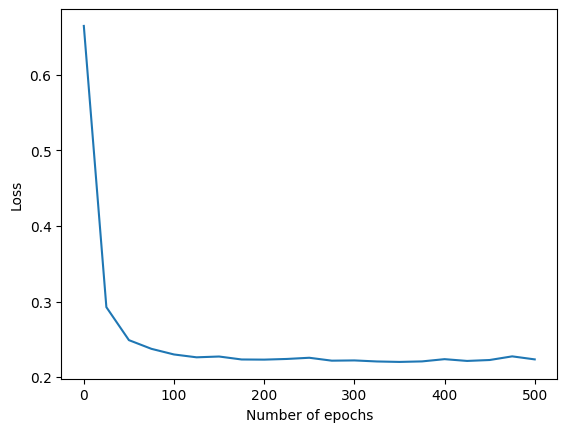

In [67]:
import matplotlib.pyplot as plt

plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.plot(epochs,loss_values)